<a href="https://colab.research.google.com/github/ta6345538/SML_PRACtice/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Smart Weight Prediction Using Polynomial Regressio

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Fish.csv")

In [13]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_poly)

In [18]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Lower is better
print("R2 Score:", r2_score(y_test, y_pred))  # Closer to 1 is better

Mean Squared Error: 4655.846662850337
R2 Score: 0.9672675055786767


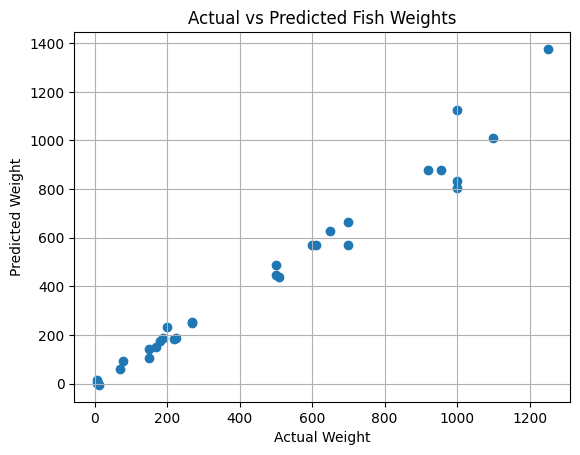

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Fish Weights")
plt.grid(True)
plt.show()

Fish Species Classification with Logistic Regression

In [21]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [22]:
X = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Species']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = clf.predict(X_test_scaled)

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


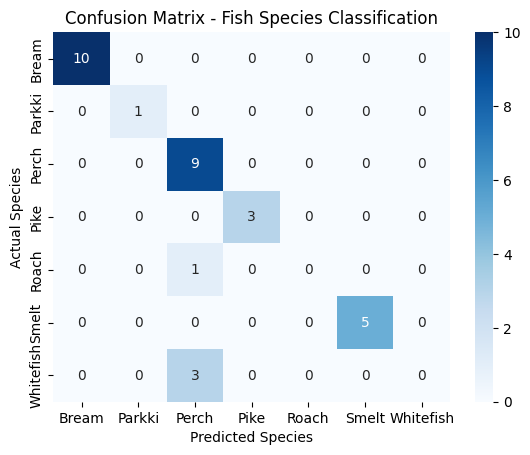

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix - Fish Species Classification")
plt.show()